In [1]:
# Notebook Setup

#%reload_ext autoreload

import sys

import os

from GradDescent import *

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import ipywidgets as widgets


%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
# Data Loading

data1 = pd.read_csv("house_data_complete.csv")
data2 = pd.read_csv("house_prices_data_training_data.csv")

data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [3]:
# Checking Missing Data

data2NA = data1.isna().any()
data2Null = data1.isnull().any()
# print(data2NA,data2Null)


In [4]:
# Moving the data to numpy ndarray and Removing NAN values

data = data2.iloc[:,3:].to_numpy(dtype="float32")
[b]=np.where(np.all(np.isnan(data),axis=1))
X = np.delete(data,[b],axis=0)
print(X.shape)
print(np.any(np.isnan(X)))

price = data2.iloc[:,2].to_numpy(dtype="float32")
y = np.delete(price,[b],axis=0)
print(y.shape)
print(np.any(np.isnan(y)))


(17999, 18)
False
(17999,)
False


In [5]:
# Data Visualization 1

out1 = widgets.Output()
out2 = widgets.Output()
out3 = widgets.Output()
out4 = widgets.Output()
out5 = widgets.Output()
out6 = widgets.Output()
out7 = widgets.Output()
out8 = widgets.Output()
out9 = widgets.Output()

tab = widgets.Tab([out1, out2, out3, out4, out5, out6, out7, out8, out9])
tab.set_title(0, 'Bedrooms')
tab.set_title(1, 'Bathrooms')
tab.set_title(2, 'sqft_living')
tab.set_title(3, 'sqft_lot')
tab.set_title(4, 'Floors')
tab.set_title(5, 'Waterfront')
tab.set_title(6, 'View')
tab.set_title(7, 'Conidtion')
tab.set_title(8, 'Grade')

with out1:
    plt.scatter(X[:,0], y )
    plt.ylabel('Price')
    plt.xlabel('Bedrooms')
    plt.show()

with out2:
    plt.scatter(X[:,1], y )
    plt.ylabel('Price')
    plt.xlabel('Bathrooms')
    plt.show()
    
with out3:
    plt.scatter(X[:,2], y )
    plt.ylabel('Price')
    plt.xlabel('sqft_living')
    plt.show()
    
with out4:
    plt.scatter(X[:,3], y )
    plt.ylabel('Price')
    plt.xlabel('sqft_lot')
    plt.show()
    
with out5:
    plt.scatter(X[:,4], y )
    plt.ylabel('Price')
    plt.xlabel('Floors')
    plt.show()
    
with out6:
    plt.scatter(X[:,5], y )
    plt.ylabel('Price')
    plt.xlabel('Waterfront')
    plt.show()
    
with out7:
    plt.scatter(X[:,6], y )
    plt.ylabel('Price')
    plt.xlabel('View')
    plt.show()
    
with out8:
    plt.scatter(X[:,7], y )
    plt.ylabel('Price')
    plt.xlabel('Condition')
    plt.show()
    
with out9:
    plt.scatter(X[:,8], y )
    plt.ylabel('Price')
    plt.xlabel('Grade')
    plt.show()
    
display(tab)

In [6]:
# Data Visualization 1

out1 = widgets.Output()
out2 = widgets.Output()
out3 = widgets.Output()
out4 = widgets.Output()
out5 = widgets.Output()
out6 = widgets.Output()
out7 = widgets.Output()
out8 = widgets.Output()
out9 = widgets.Output()

tab = widgets.Tab([out1, out2, out3, out4, out5, out6, out7, out8, out9])
tab.set_title(0, 'sqft_above')
tab.set_title(1, 'sqft_basement')
tab.set_title(2, 'yr_built')
tab.set_title(3, 'yr_renovated')
tab.set_title(4, 'Zipcode')
tab.set_title(5, 'lat')
tab.set_title(6, 'long')
tab.set_title(7, 'sqft_living15')
tab.set_title(8, 'sqft_lot15')

with out1:
    plt.scatter(X[:,9], y )
    plt.ylabel('Price')
    plt.xlabel('sqft_above')
    plt.show()

with out2:
    plt.scatter(X[:,10], y )
    plt.ylabel('Price')
    plt.xlabel('sqft_basement')
    plt.show()
    
with out3:
    plt.scatter(X[:,11], y )
    plt.ylabel('Price')
    plt.xlabel('yr_built')
    plt.show()
    
with out4:
    plt.scatter(X[:,12], y )
    plt.ylabel('Price')
    plt.xlabel('yr_renovated')
    plt.show()
    
with out5:
    plt.scatter(X[:,13], y )
    plt.ylabel('Price')
    plt.xlabel('Zipcode')
    plt.show()
    
with out6:
    plt.scatter(X[:,14], y )
    plt.ylabel('Price')
    plt.xlabel('lat')
    plt.show()
    
with out7:
    plt.scatter(X[:,15], y )
    plt.ylabel('Price')
    plt.xlabel('long')
    plt.show()
    
with out8:
    plt.scatter(X[:,16], y )
    plt.ylabel('Price')
    plt.xlabel('sqft_living15')
    plt.show()
    
with out9:
    plt.scatter(X[:,17], y )
    plt.ylabel('Price')
    plt.xlabel('sqft_lot15')
    plt.show()
    
display(tab)

In [7]:
# Cleaning the data set

X = np.delete(X,12,1)
X[np.where(X[:,0]>30),0] = 0

In [8]:
# Data Normailzation

X_norm = featureNormalize(X)

mu_y = np.mean(y)
sigma_y = np.std(y)
y_norm = (y-mu_y)/sigma_y

In [9]:
# Data Sampling

X1 = X_norm[0:6000,:]
y1 = y_norm[0:6000]

X2 = X_norm[6000:12000,:]
y2 = y_norm[6000:12000]

X3 = X_norm[12000:18000,:]
y3 = y_norm[12000:18000]

Alpha chosen = 0.004


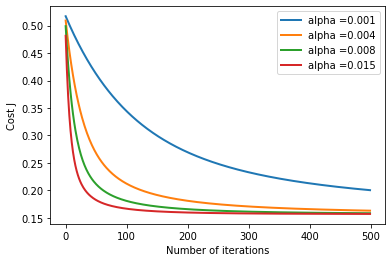

In [10]:
# First Hypothesis (Linear)
# Fold 1

X_train = np.append(X1.copy(),X2.copy(),axis = 0)
y_train = np.append(y1.copy(),y2.copy())

# Computing Cost for Training Data with different Learning Rates

m = y_train.size
X_train_ = np.append(np.ones((m,1)), X_train, axis=1)

lamda = 1
num_iters = 500
alpha = np.array([0.001,0.004,0.008,0.015])

plt.figure() 
for i in range(len(alpha)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha[i], lamda,  num_iters)
    plt.plot(np.arange(len(J_history)), J_history, lw=2,label="alpha ="+str(alpha[i]))    
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()

print("Alpha chosen = 0.004")


Lambda Chosen = 1


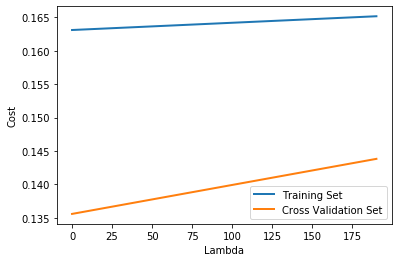

In [11]:
# First Hypothesis (Linear)
# Fold 1

X_cv = X3.copy()[0:3000,:]
y_cv = y3.copy()[0:3000]

# Computing Cost for Training Set and Cross Validation Set with different Regulaization Parameters

m = y_cv.size
X_cv_ = np.append(np.ones((m,1)), X_cv, axis=1)

lamda = np.arange(0,200,10)
num_iters = 500
alpha = 0.004

Cost_train = np.zeros(lamda.shape[0])
Cost_test = np.zeros(lamda.shape[0])

for i in range(len(lamda)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda[i],  num_iters)
    Cost_train[i] = J_history[-1]
    Cost_test[i] = computeCost(X_cv_, y_cv, theta, lamda[i])
    
plt.figure() 
plt.plot(lamda, Cost_train, lw=2,label="Training Set")
plt.plot(lamda, Cost_test, lw=2,label="Cross Validation Set")
plt.xlabel('Lambda')
plt.ylabel('Cost')
plt.legend()

print("Lambda Chosen = 1")

In [12]:
# First Hypothesis (Linear)
# Fold 1

X_t = X3.copy()[3000:,:]
y_t = y3.copy()[3000:]

# Computing Cost for Testing Set

m = y_t.size
X_t_ = np.append(np.ones((m,1)), X_t, axis=1)

Cost_hyp1 = np.zeros(3)
lamda = 1
num_iters = 500
alpha = 0.004

theta = np.zeros(X_train_.shape[1])
theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda,  num_iters)
Cost_hyp1[0] = computeCost(X_t_, y_t, theta, lamda)    
print("Cost for the training set for the first fold for hypothesis 1 = "+str(Cost_hyp1[0]))

Cost for the training set for the first fold for hypothesis 1 = 0.13806283928790491


Alpha chosen = 0.004


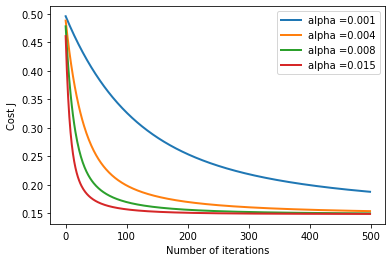

In [13]:
# First Hypothesis (Linear)
# Fold 2

X_train = np.append(X1.copy(),X3.copy(),axis = 0)
y_train = np.append(y1.copy(),y3.copy())

# Computing Cost for Training Data with different Learning Rates
m = y_train.size
X_train_ = np.append(np.ones((m,1)), X_train, axis=1)

lamda = 1
num_iters = 500
alpha = np.array([0.001,0.004,0.008,0.015])

plt.figure() 
for i in range(len(alpha)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha[i], lamda,  num_iters)
    plt.plot(np.arange(len(J_history)), J_history, lw=2,label="alpha ="+str(alpha[i]))    
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()

print("Alpha chosen = 0.004")


Lambda Chosen = 1


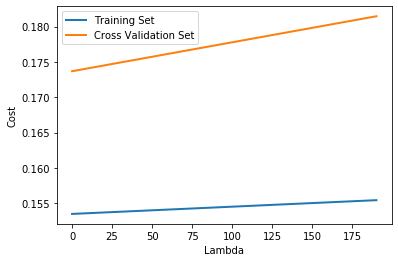

In [14]:
# First Hypothesis (Linear)
# Fold 2

X_cv = X2.copy()[0:3000,:]
y_cv = y2.copy()[0:3000]

# Computing Cost for Training Set and Cross Validation Set with different Regulaization Parameters

m = y_cv.size
X_cv_ = np.append(np.ones((m,1)), X_cv, axis=1)

lamda = np.arange(0,200,10)
num_iters = 500
alpha = 0.004

Cost_train = np.zeros(lamda.shape[0])
Cost_test = np.zeros(lamda.shape[0])

for i in range(len(lamda)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda[i],  num_iters)
    Cost_train[i] = J_history[-1]
    Cost_test[i] = computeCost(X_cv_, y_cv, theta, lamda[i])
    
plt.figure() 
plt.plot(lamda, Cost_train, lw=2,label="Training Set")
plt.plot(lamda, Cost_test, lw=2,label="Cross Validation Set")
plt.xlabel('Lambda')
plt.ylabel('Cost')
plt.legend()

print("Lambda Chosen = 1")

In [15]:
# First Hypothesis (Linear)
# Fold 2

X_t = X2.copy()[3000:,:]
y_t = y2.copy()[3000:]

# Computing Cost for Testing Set

m = y_t.size
X_t_ = np.append(np.ones((m,1)), X_t, axis=1)

lamda = 1
num_iters = 500
alpha = 0.004

theta = np.zeros(X_train_.shape[1])
theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda,  num_iters)
Cost_hyp1[1] = computeCost(X_t_, y_t, theta, lamda)    
print("Cost for the training set for the second fold for hypothesis 1 = "+str(Cost_hyp1[1]))

Cost for the training set for the second fold for hypothesis 1 = 0.1436503931781905


Alpha chosen = 0.004


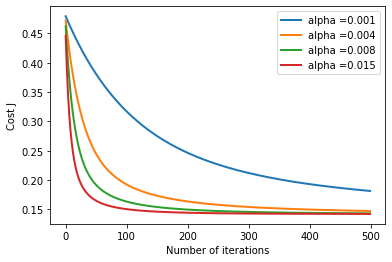

In [16]:
# First Hypothesis (Linear)
# Fold 3

X_train = np.append(X2.copy(),X3.copy(),axis = 0)
y_train = np.append(y2.copy(),y3.copy())

# Computing Cost for Training Data with different Learning Rates
m = y_train.size
X_train_ = np.append(np.ones((m,1)), X_train, axis=1)

lamda = 1
num_iters = 500
alpha = np.array([0.001,0.004,0.008,0.015])

plt.figure() 
for i in range(len(alpha)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha[i], lamda,  num_iters)
    plt.plot(np.arange(len(J_history)), J_history, lw=2,label="alpha ="+str(alpha[i]))    
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()

print("Alpha chosen = 0.004")

Lambda Chosen = 1


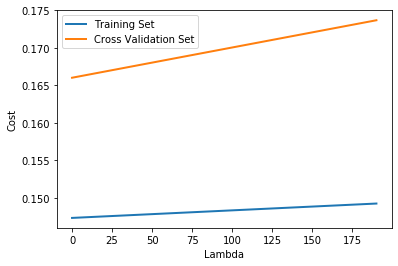

In [17]:
# First Hypothesis (Linear)
# Fold 3

X_cv = X1.copy()[0:3000,:]
y_cv = y1.copy()[0:3000]

# Computing Cost for Training Set and Cross Validation Set with different Regulaization Parameters

m = y_cv.size
X_cv_ = np.append(np.ones((m,1)), X_cv, axis=1)

lamda = np.arange(0,200,10)
num_iters = 500
alpha = 0.004

Cost_train = np.zeros(lamda.shape[0])
Cost_test = np.zeros(lamda.shape[0])

for i in range(len(lamda)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda[i],  num_iters)
    Cost_train[i] = J_history[-1]
    Cost_test[i] = computeCost(X_cv_, y_cv, theta, lamda[i])
    
plt.figure() 
plt.plot(lamda, Cost_train, lw=2,label="Training Set")
plt.plot(lamda, Cost_test, lw=2,label="Cross Validation Set")
plt.xlabel('Lambda')
plt.ylabel('Cost')
plt.legend()

print("Lambda Chosen = 1")

In [18]:
# First Hypothesis (Linear)
# Fold 3

X_t = X1.copy()[3000:,:]
y_t = y1.copy()[3000:]

# Computing Cost for Testing Set

m = y_t.size
X_t_ = np.append(np.ones((m,1)), X_t, axis=1)

lamda = 1
num_iters = 500
alpha = 0.004

theta = np.zeros(X_train_.shape[1])
theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda,  num_iters)
Cost_hyp1[2] = computeCost(X_t_, y_t, theta, lamda)    
print("Cost for the training set for the third fold for hypothesis 1 = "+str(Cost_hyp1[2]))

avg = np.average(Cost_hyp1)

print("Averge Cost for Hypothesis 1 = "+str(avg))

Cost for the training set for the third fold for hypothesis 1 = 0.17889308176300095
Averge Cost for Hypothesis 1 = 0.15353543807636547


In [19]:
# Second Hypothesis (Squaring Bedrooms and Grade )
X_hyp2 = X.copy()
X_hyp2 = np.append(X_hyp2,np.reshape(np.square(X_hyp2[:,0]),(17999,1)),axis=1)
X_hyp2 = np.append(X_hyp2,np.reshape(np.square(X_hyp2[:,9]),(17999,1)),axis=1)
X_norm = featureNormalize(X_hyp2)

mu_y = np.mean(y)
sigma_y = np.std(y)
y_norm = (y-mu_y)/sigma_y

In [20]:
# Data Sampling

X1 = X_norm[0:6000,:]
y1 = y_norm[0:6000]

X2 = X_norm[6000:12000,:]
y2 = y_norm[6000:12000]

X3 = X_norm[12000:18000,:]
y3 = y_norm[12000:18000]

Alpha chosen = 0.004


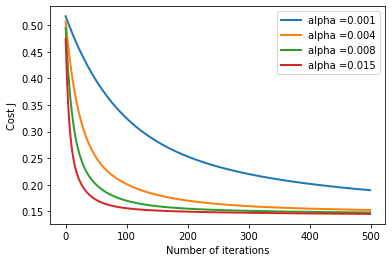

In [21]:
# Second Hypothesis
# Fold 1

X_train = np.append(X1.copy(),X2.copy(),axis = 0)
y_train = np.append(y1.copy(),y2.copy())

# Computing Cost for Training Data with different Learning Rates

m = y_train.size
X_train_ = np.append(np.ones((m,1)), X_train, axis=1)

lamda = 1
num_iters = 500
alpha = np.array([0.001,0.004,0.008,0.015])

plt.figure() 
for i in range(len(alpha)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha[i], lamda,  num_iters)
    plt.plot(np.arange(len(J_history)), J_history, lw=2,label="alpha ="+str(alpha[i]))    
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()

print("Alpha chosen = 0.004")

Lambda Chosen = 1


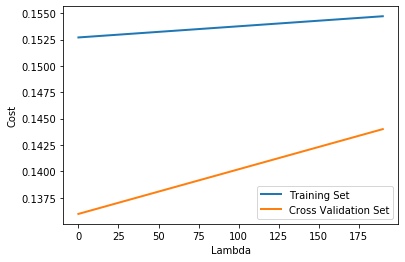

In [22]:
# Second Hypothesis
# Fold 1

X_cv = X3.copy()[0:3000,:]
y_cv = y3.copy()[0:3000]

# Computing Cost for Training Set and Cross Validation Set with different Regulaization Parameters

m = y_cv.size
X_cv_ = np.append(np.ones((m,1)), X_cv, axis=1)

lamda = np.arange(0,200,10)
num_iters = 500
alpha = 0.004

Cost_train = np.zeros(lamda.shape[0])
Cost_test = np.zeros(lamda.shape[0])

for i in range(len(lamda)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda[i],  num_iters)
    Cost_train[i] = J_history[-1]
    Cost_test[i] = computeCost(X_cv_, y_cv, theta, lamda[i])
    
plt.figure() 
plt.plot(lamda, Cost_train, lw=2,label="Training Set")
plt.plot(lamda, Cost_test, lw=2,label="Cross Validation Set")
plt.xlabel('Lambda')
plt.ylabel('Cost')
plt.legend()

print("Lambda Chosen = 1")

In [23]:
# Second Hypothesis
# Fold 1

X_t = X3.copy()[3000:,:]
y_t = y3.copy()[3000:]

# Computing Cost for Testing Set

m = y_t.size
X_t_ = np.append(np.ones((m,1)), X_t, axis=1)

Cost_hyp2 = np.zeros(3)
lamda = 1
num_iters = 500
alpha = 0.004

theta = np.zeros(X_train_.shape[1])
theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda,  num_iters)
Cost_hyp2[0] = computeCost(X_t_, y_t, theta, lamda)    
print("Cost for the training set for the first fold for hypothesis 2 = "+str(Cost_hyp2[0]))

Cost for the training set for the first fold for hypothesis 2 = 0.1350548583898257


Alpha chosen = 0.004


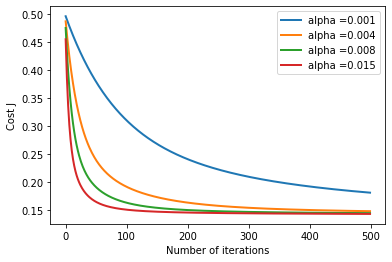

In [24]:
# Second Hypothesis
# Fold 2

X_train = np.append(X1.copy(),X3.copy(),axis = 0)
y_train = np.append(y1.copy(),y3.copy())

# Computing Cost for Training Data with different Learning Rates
m = y_train.size
X_train_ = np.append(np.ones((m,1)), X_train, axis=1)

lamda = 1
num_iters = 500
alpha = np.array([0.001,0.004,0.008,0.015])

plt.figure() 
for i in range(len(alpha)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha[i], lamda,  num_iters)
    plt.plot(np.arange(len(J_history)), J_history, lw=2,label="alpha ="+str(alpha[i]))    
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()

print("Alpha chosen = 0.004")

Lambda Chosen = 1


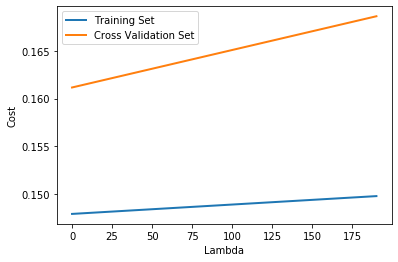

In [25]:
# Second Hypothesis 
# Fold 2

X_cv = X2.copy()[0:3000,:]
y_cv = y2.copy()[0:3000]

# Computing Cost for Training Set and Cross Validation Set with different Regulaization Parameters

m = y_cv.size
X_cv_ = np.append(np.ones((m,1)), X_cv, axis=1)

lamda = np.arange(0,200,10)
num_iters = 500
alpha = 0.004

Cost_train = np.zeros(lamda.shape[0])
Cost_test = np.zeros(lamda.shape[0])

for i in range(len(lamda)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda[i],  num_iters)
    Cost_train[i] = J_history[-1]
    Cost_test[i] = computeCost(X_cv_, y_cv, theta, lamda[i])
    
plt.figure() 
plt.plot(lamda, Cost_train, lw=2,label="Training Set")
plt.plot(lamda, Cost_test, lw=2,label="Cross Validation Set")
plt.xlabel('Lambda')
plt.ylabel('Cost')
plt.legend()

print("Lambda Chosen = 1")

In [26]:
# Second Hypothesis
# Fold 2

X_t = X2.copy()[3000:,:]
y_t = y2.copy()[3000:]

# Computing Cost for Testing Set

m = y_t.size
X_t_ = np.append(np.ones((m,1)), X_t, axis=1)

lamda = 1
num_iters = 500
alpha = 0.004

theta = np.zeros(X_train_.shape[1])
theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda,  num_iters)
Cost_hyp2[1] = computeCost(X_t_, y_t, theta, lamda)    
print("Cost for the training set for the second fold for hypothesis 2 = "+str(Cost_hyp2[1]))

Cost for the training set for the second fold for hypothesis 2 = 0.1359644124139528


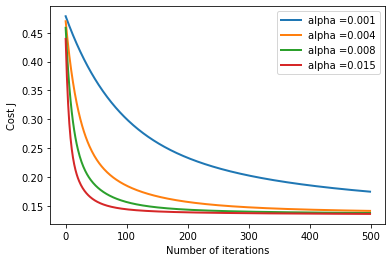

In [27]:
# Second Hypothesis
# Fold 3

X_train = np.append(X2.copy(),X3.copy(),axis = 0)
y_train = np.append(y2.copy(),y3.copy())

# Computing Cost for Training Data with different Learning Rates
m = y_train.size
X_train_ = np.append(np.ones((m,1)), X_train, axis=1)

lamda = 1
num_iters = 500
alpha = np.array([0.001,0.004,0.008,0.015])

plt.figure() 
for i in range(len(alpha)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha[i], lamda,  num_iters)
    plt.plot(np.arange(len(J_history)), J_history, lw=2,label="alpha ="+str(alpha[i]))    
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()

Lambda Chosen = 1


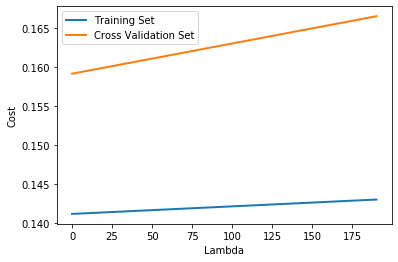

In [28]:
# Second Hypothesis 
# Fold 3

X_cv = X1.copy()[0:3000,:]
y_cv = y1.copy()[0:3000]

# Computing Cost for Training Set and Cross Validation Set with different Regulaization Parameters

m = y_cv.size
X_cv_ = np.append(np.ones((m,1)), X_cv, axis=1)

lamda = np.arange(0,200,10)
num_iters = 500
alpha = 0.004

Cost_train = np.zeros(lamda.shape[0])
Cost_test = np.zeros(lamda.shape[0])

for i in range(len(lamda)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda[i],  num_iters)
    Cost_train[i] = J_history[-1]
    Cost_test[i] = computeCost(X_cv_, y_cv, theta, lamda[i])
    
plt.figure() 
plt.plot(lamda, Cost_train, lw=2,label="Training Set")
plt.plot(lamda, Cost_test, lw=2,label="Cross Validation Set")
plt.xlabel('Lambda')
plt.ylabel('Cost')
plt.legend()

print("Lambda Chosen = 1")

In [29]:
# Second Hypothesis
# Fold 3

X_t = X1.copy()[3000:,:]
y_t = y1.copy()[3000:]

# Computing Cost for Testing Set

m = y_t.size
X_t_ = np.append(np.ones((m,1)), X_t, axis=1)

lamda = 1
num_iters = 500
alpha = 0.004

theta = np.zeros(X_train_.shape[1])
theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda,  num_iters)
Cost_hyp2[2] = computeCost(X_t_, y_t, theta, lamda)    
print("Cost for the training set for the third fold for hypothesis 2 = "+str(Cost_hyp2[2]))

avg = np.average(Cost_hyp2)

print("Averge Cost for Hypothesis 2 = "+str(avg))

Cost for the training set for the third fold for hypothesis 2 = 0.1667818891711874
Averge Cost for Hypothesis 2 = 0.1459337199916553


In [30]:
# Third Hypothesis (Squaring Long and Sqft Living 15 )
X_hyp3 = X_hyp2.copy()
X_hyp3 = np.append(X_hyp3,np.reshape(np.square(X_hyp3[:,16]),(17999,1)),axis=1)
X_hyp3 = np.append(X_hyp3,np.reshape(np.square(X_hyp3[:,19]),(17999,1)),axis=1)
X_norm = featureNormalize(X_hyp3)

mu_y = np.mean(y)
sigma_y = np.std(y)
y_norm = (y-mu_y)/sigma_y

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [31]:
# Data Sampling

X1 = X_norm[0:6000,:]
y1 = y_norm[0:6000]

X2 = X_norm[6000:12000,:]
y2 = y_norm[6000:12000]

X3 = X_norm[12000:18000,:]
y3 = y_norm[12000:18000]

Alpha chosen = 0.004


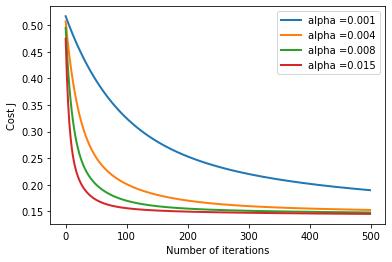

In [32]:
# Third Hypothesis
# Fold 1

X_train = np.append(X1.copy(),X2.copy(),axis = 0)
y_train = np.append(y1.copy(),y2.copy())

# Computing Cost for Training Data with different Learning Rates

m = y_train.size
X_train_ = np.append(np.ones((m,1)), X_train, axis=1)

lamda = 1
num_iters = 500
alpha = np.array([0.001,0.004,0.008,0.015])

plt.figure() 
for i in range(len(alpha)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha[i], lamda,  num_iters)
    plt.plot(np.arange(len(J_history)), J_history, lw=2,label="alpha ="+str(alpha[i]))    
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()

print("Alpha chosen = 0.004")

Lambda Chosen = 1


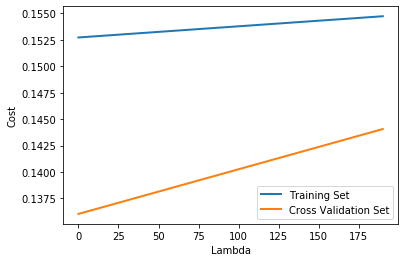

In [33]:
# Third Hypothesis
# Fold 1

X_cv = X3.copy()[0:3000,:]
y_cv = y3.copy()[0:3000]

# Computing Cost for Training Set and Cross Validation Set with different Regulaization Parameters

m = y_cv.size
X_cv_ = np.append(np.ones((m,1)), X_cv, axis=1)

lamda = np.arange(0,200,10)
num_iters = 500
alpha = 0.004

Cost_train = np.zeros(lamda.shape[0])
Cost_test = np.zeros(lamda.shape[0])

for i in range(len(lamda)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda[i],  num_iters)
    Cost_train[i] = J_history[-1]
    Cost_test[i] = computeCost(X_cv_, y_cv, theta, lamda[i])
    
plt.figure() 
plt.plot(lamda, Cost_train, lw=2,label="Training Set")
plt.plot(lamda, Cost_test, lw=2,label="Cross Validation Set")
plt.xlabel('Lambda')
plt.ylabel('Cost')
plt.legend()

print("Lambda Chosen = 1")

In [34]:
# Third Hypothesis
# Fold 1

X_t = X3.copy()[3000:,:]
y_t = y3.copy()[3000:]

# Computing Cost for Testing Set

m = y_t.size
X_t_ = np.append(np.ones((m,1)), X_t, axis=1)

Cost_hyp3 = np.zeros(3)
lamda = 1
num_iters = 500
alpha = 0.004

theta = np.zeros(X_train_.shape[1])
theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda,  num_iters)
Cost_hyp3[0] = computeCost(X_t_, y_t, theta, lamda)    
print("Cost for the training set for the first fold for hypothesis 3 = "+str(Cost_hyp3[0]))

Cost for the training set for the first fold for hypothesis 3 = 0.13508186440795358


Alpha chosen = 0.004


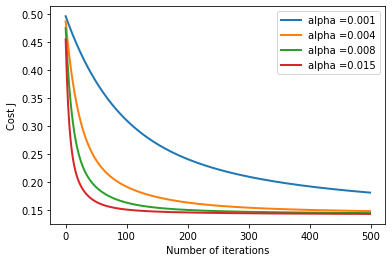

In [35]:
# Third Hypothesis
# Fold 2

X_train = np.append(X1.copy(),X3.copy(),axis = 0)
y_train = np.append(y1.copy(),y3.copy())

# Computing Cost for Training Data with different Learning Rates
m = y_train.size
X_train_ = np.append(np.ones((m,1)), X_train, axis=1)

lamda = 1
num_iters = 500
alpha = np.array([0.001,0.004,0.008,0.015])

plt.figure() 
for i in range(len(alpha)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha[i], lamda,  num_iters)
    plt.plot(np.arange(len(J_history)), J_history, lw=2,label="alpha ="+str(alpha[i]))    
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()

print("Alpha chosen = 0.004")

Lambda Chosen = 1


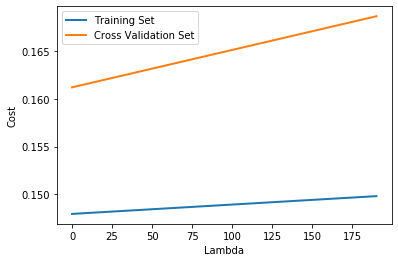

In [36]:
# Third Hypothesis 
# Fold 2

X_cv = X2.copy()[0:3000,:]
y_cv = y2.copy()[0:3000]

# Computing Cost for Training Set and Cross Validation Set with different Regulaization Parameters

m = y_cv.size
X_cv_ = np.append(np.ones((m,1)), X_cv, axis=1)

lamda = np.arange(0,200,10)
num_iters = 500
alpha = 0.004

Cost_train = np.zeros(lamda.shape[0])
Cost_test = np.zeros(lamda.shape[0])

for i in range(len(lamda)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda[i],  num_iters)
    Cost_train[i] = J_history[-1]
    Cost_test[i] = computeCost(X_cv_, y_cv, theta, lamda[i])
    
plt.figure() 
plt.plot(lamda, Cost_train, lw=2,label="Training Set")
plt.plot(lamda, Cost_test, lw=2,label="Cross Validation Set")
plt.xlabel('Lambda')
plt.ylabel('Cost')
plt.legend()

print("Lambda Chosen = 1")

In [37]:
# Third Hypothesis
# Fold 2

X_t = X2.copy()[3000:,:]
y_t = y2.copy()[3000:]

# Computing Cost for Testing Set

m = y_t.size
X_t_ = np.append(np.ones((m,1)), X_t, axis=1)

lamda = 1
num_iters = 500
alpha = 0.004

theta = np.zeros(X_train_.shape[1])
theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda,  num_iters)
Cost_hyp3[1] = computeCost(X_t_, y_t, theta, lamda)    
print("Cost for the training set for the second fold for hypothesis 3 = "+str(Cost_hyp3[1]))

Cost for the training set for the second fold for hypothesis 3 = 0.13595310904281036


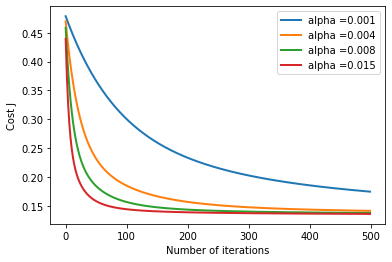

In [38]:
# Third Hypothesis
# Fold 3

X_train = np.append(X2.copy(),X3.copy(),axis = 0)
y_train = np.append(y2.copy(),y3.copy())

# Computing Cost for Training Data with different Learning Rates
m = y_train.size
X_train_ = np.append(np.ones((m,1)), X_train, axis=1)

lamda = 1
num_iters = 500
alpha = np.array([0.001,0.004,0.008,0.015])

plt.figure() 
for i in range(len(alpha)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha[i], lamda,  num_iters)
    plt.plot(np.arange(len(J_history)), J_history, lw=2,label="alpha ="+str(alpha[i]))    
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()

Lambda Chosen = 1


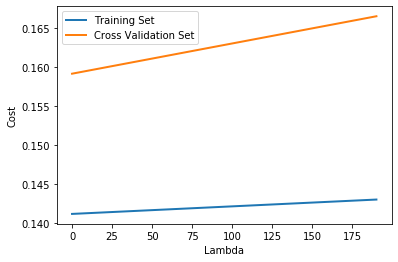

In [39]:
# Second Hypothesis 
# Fold 3

X_cv = X1.copy()[0:3000,:]
y_cv = y1.copy()[0:3000]

# Computing Cost for Training Set and Cross Validation Set with different Regulaization Parameters

m = y_cv.size
X_cv_ = np.append(np.ones((m,1)), X_cv, axis=1)

lamda = np.arange(0,200,10)
num_iters = 500
alpha = 0.004

Cost_train = np.zeros(lamda.shape[0])
Cost_test = np.zeros(lamda.shape[0])

for i in range(len(lamda)):
    theta = np.zeros(X_train_.shape[1])
    theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda[i],  num_iters)
    Cost_train[i] = J_history[-1]
    Cost_test[i] = computeCost(X_cv_, y_cv, theta, lamda[i])
    
plt.figure() 
plt.plot(lamda, Cost_train, lw=2,label="Training Set")
plt.plot(lamda, Cost_test, lw=2,label="Cross Validation Set")
plt.xlabel('Lambda')
plt.ylabel('Cost')
plt.legend()

print("Lambda Chosen = 1")

In [40]:
# Second Hypothesis
# Fold 3

X_t = X1.copy()[3000:,:]
y_t = y1.copy()[3000:]

# Computing Cost for Testing Set

m = y_t.size
X_t_ = np.append(np.ones((m,1)), X_t, axis=1)

lamda = 1
num_iters = 500
alpha = 0.004

theta = np.zeros(X_train_.shape[1])
theta, J_history = gradientDescent(X_train_, y_train, theta, alpha, lamda,  num_iters)
Cost_hyp3[2] = computeCost(X_t_, y_t, theta, lamda)    
print("Cost for the training set for the third fold for hypothesis 3 = "+str(Cost_hyp3[2]))

avg = np.average(Cost_hyp3)

print("Averge Cost for Hypothesis 3 = "+str(avg))

Cost for the training set for the third fold for hypothesis 3 = 0.16681172526604401
Averge Cost for Hypothesis 3 = 0.1459488995722693


Hypothesis chosen is the Second Hypothesis because it has the leas average cost for the testing data.